In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
TARGET_SIZE = (64, 64)   # keep feature size manageable
DATA_DIR = "/kaggle/input/plantvillage-dataset/color"


In [3]:
def load_data(directory):
    X = []  # features
    y = []  # labels
    
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        
        if not os.path.isdir(label_path):
            continue
        
        for file in os.listdir(label_path):
            if file.lower().endswith(('.jpg', '.png')):
                img_path = os.path.join(label_path, file)
                
                # Read image
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
                # Resize
                img = cv2.resize(img, TARGET_SIZE)
                
                # Flatten 
                vector = img.flatten()
                
                X.append(vector)
                y.append(label)
    
    return np.array(X), np.array(y)


In [4]:
X, y = load_data(DATA_DIR)

print("Feature shape:", X.shape)
print("Labels shape:", y.shape)


Feature shape: (54304, 12288)
Labels shape: (54304,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train_scaled, y_train)

y_dummy = dummy.predict(X_test_scaled)
dummy_acc = accuracy_score(y_test, y_dummy)

print("Dummy Baseline Accuracy:", dummy_acc)


Dummy Baseline Accuracy: 0.1014639535954332


In [8]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)   # NOTE: RF does NOT need scaled data

y_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

print("Random Forest Training Accuracy:", train_acc)
print("Random Forest Accuracy:", test_acc)

Random Forest Training Accuracy: 1.0
Random Forest Accuracy: 0.6817972562379154


<Figure size 1000x1000 with 0 Axes>

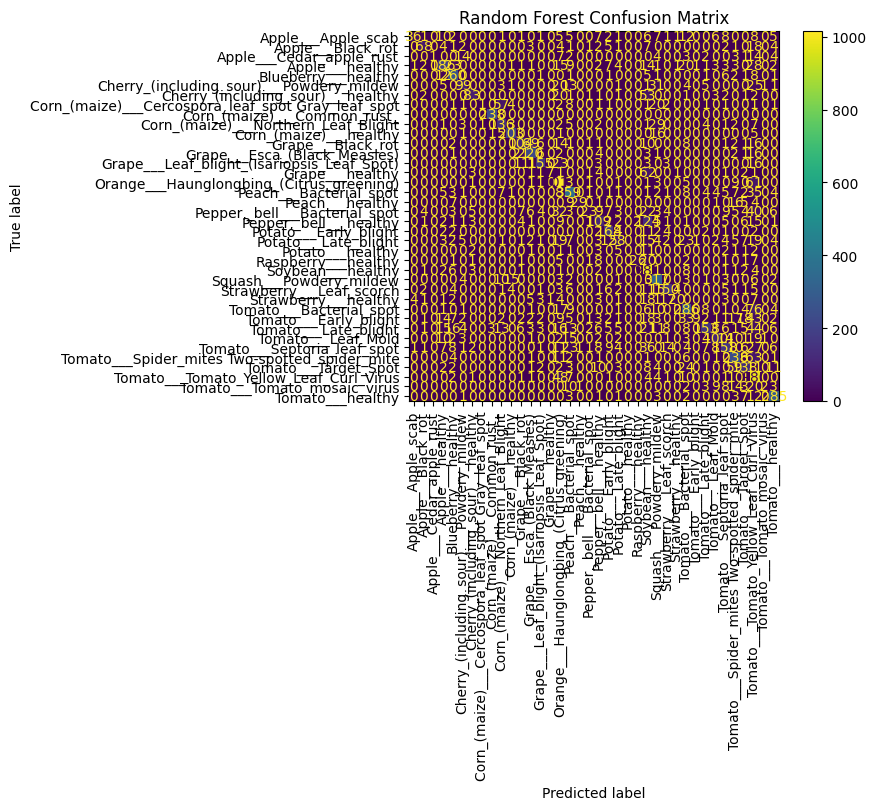

In [9]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=rf.classes_
)

plt.figure(figsize=(10, 10))
disp.plot(xticks_rotation=90)
plt.title("Random Forest Confusion Matrix")
plt.show()
